# BTC Price Prediction Using Linear Regression
This notebook demonstrates how to use linear regression to predict BTC prices based on historical data.

## Import Libraries
Import necessary libraries for data manipulation, downloading stock data, mathematical operations, and machine learning.

In [12]:
import pandas as pd
import yfinance as yf
import math, datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
style.use('ggplot')

## Download and Prepare Data
Download  data for the past two years and prepare the DataFrame.

In [13]:
# Download  BTC data for the past two years
df = yf.download('BTC-USD', period="6mo")

# Filter the DataFrame to include only the needed columns
df = df[['Close', 'High', 'Low', 'Open', 'Volume']]

# Create new columns with meaningful data
df['HIGHLOW-PERCENTAGE'] = (df['High'] - df['Close']) / df['Close'] * 100
df['PERCENTAGE-change'] = (df['Close'] - df['Open']) / df['Open'] * 100

# Filter the DataFrame to include only the needed columns
df = df[['Close', 'HIGHLOW-PERCENTAGE', 'PERCENTAGE-change', 'Volume']]

[*********************100%***********************]  1 of 1 completed


## Define Forecast Column and Period
Define the column to forecast and the forecast period.

In [14]:
# Define the column to forecast
forecast_coloumn = 'Close'

# Fill any missing values with a large negative number
df.fillna(-99999, inplace=True)

# Define the forecast period (2% of the DataFrame length)
forecast_out = int(math.ceil(0.02 * len(df)))
print(f"Forecast out: {forecast_out}")

Forecast out: 4


## Create Label Column
Create the label column by shifting the forecast column.

In [15]:
# Create the label column by shifting the forecast column
df['label'] = df[forecast_coloumn].shift(-forecast_out)

# Ensure the DataFrame is sorted by its index
df.sort_index(inplace=True)

## Prepare Features and Labels
Prepare the features (X) and labels (y) for the model.

In [16]:
# Prepare features (X) and labels (y)
x = np.array(df.drop(['label'], axis=1))
x = preprocessing.scale(x)  # Normalize the data
x_latest = x[-forecast_out:]
x = x[:-forecast_out]


# Drop rows with NaN values
df.dropna(inplace=True)
y = np.array(df['label'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_22816\1811770151.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = np.array(df.drop(['label'], axis=1))
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


## Split Data
Split the data into training and testing sets.

In [17]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

## Train the Model
Train the model using Linear Regression.

In [18]:
# Train the model using Linear Regression
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

## pickiling
Pickling in Python: A Simple Explanation

Imagine you have a delicious fruit salad. You want to preserve it for later, so you decide to pickle it. In Python, pickling is similar.

Pickling is the process of converting Python objects (like lists, dictionaries, or even custom classes) into a stream of bytes. This byte stream can be saved to a file or sent over a network.

Why Pickle?

Saving Data: Store the state of your program or data structures for later use.
Sharing Data: Easily share complex data between different parts of your program or with other people.
The Process:

Pickling: You "pickle" your Python object, turning it into a byte stream.
Saving: This byte stream is then saved to a file.
Unpickling: Later, you "unpickle" the file, converting the byte stream back into the original Python object.
In Simple Terms:

Pickling: Turning a Python object into a "pickled" file.
Unpickling: Opening a "pickled" file and getting back the original Python object.

In [19]:
# Save the trained model (clf) to a file named 'linearregression.pickle'
with open('linearregression.pickle', 'wb') as f:
    # 'wb' mode opens the file in binary write mode
    pickle.dump(clf, f)  # Serialize the clf object and write it to the file

# Load the model from the file 'linearregression.pickle'
pickle_in = open('linearregression.pickle', 'rb')  # 'rb' mode opens the file in binary read mode
clf = pickle.load(pickle_in)  # Deserialize the object from the file and load it into clf

## Evaluate the Model
Evaluate the model's accuracy.

In [20]:
# Evaluate the model's accuracy
accuracy = clf.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9645182340861179


## Predict the Forecast
Predict the forecast using the trained model.

In [21]:
# Predict the forecast
forecast_set = clf.predict(x_latest)
print(f"Forecast: {forecast_set}, Accuracy: {accuracy}, Forecast out: {forecast_out}")

Forecast: [105203.81714088 105448.87124831 101229.11097141 102530.47115159], Accuracy: 0.9645182340861179, Forecast out: 4


## Add Forecast to DataFrame
Add the forecast to the DataFrame and plot the results.

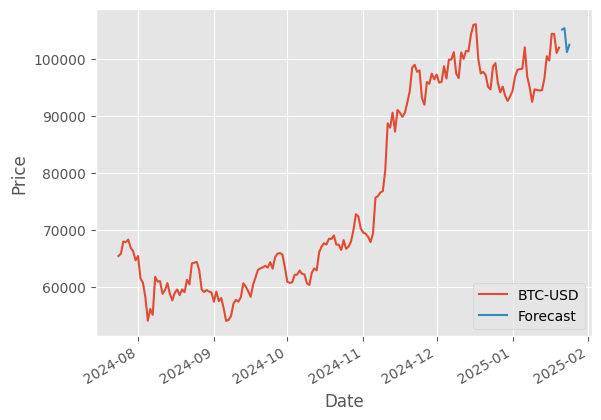

In [22]:
# Add the forecast to the DataFrame
df['Forecast'] = np.nan

# Get the last date in the DataFrame
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

# Populate the forecast column with the predicted values
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

# Plot the actual and forecasted stock prices
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()